**Importing Libraries **

For our prediction task, several libraries are being imported for use in the following steps. These libraries include pandas for data manipulation and analysis, numpy for working with numerical data arrays and matrices, matplotlib for visualizations, and various functions and classes from scikit-learn (sklearn) for machine learning tasks such as model selection, ensemble modeling, and preprocessing. Specifically, the train_test_split function is used to split a dataset into training and test sets, the RandomForestClassifier class is used to implement a random forest classifier model, the accuracy_score function is used to evaluate the performance of the model, the LabelEncoder class is used to encode labels as numerical values, and the KFold class is used to perform K-fold cross validation etc.


In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

In [146]:
fifa_df = pd.read_csv('/content/international_matches.csv')
fifa_df.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
fifa_df.describe()

,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
count,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,8379.000000,8095.000000,7787.000000,8510.000000,8162.000000,7564.000000,8312.000000,7979.000000
mean,77.854688,80.797375,323.401488,315.453576,1.609214,1.068266,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143
std,52.355225,53.232902,500.825725,490.944273,1.630127,1.263944,8.212242,8.225919,6.003114,6.268416,6.053110,5.937425,6.201906,6.124573
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,47.000000,47.000000,52.800000,53.300000,54.200000,52.800000,53.300000,54.200000
25%,33.000000,36.000000,0.000000,0.000000,0.000000,0.000000,70.000000,69.000000,71.000000,71.700000,72.500000,70.500000,71.300000,71.800000
50%,71.000000,73.000000,0.000000,0.000000,1.000000,1.000000,75.000000,74.000000,75.200000,75.700000,76.200000,74.500000,75.300000,75.500000
75%,115.000000,119.000000,547.000000,523.000000,2.000000,2.000000,81.000000,80.000000,78.800000,80.000000,79.500000,78.200000,79.700000,79.000000
max,211.000000,211.000000,2164.000000,2164.000000,31.000000,21.000000,97.000000,97.000000,91.800000,93.000000,93.200000,91.800000,93.000000,93.200000


In [98]:
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           23921 non-null  object 
 1   home_team                      23921 non-null  object 
 2   away_team                      23921 non-null  object 
 3   home_team_continent            23921 non-null  object 
 4   away_team_continent            23921 non-null  object 
 5   home_team_fifa_rank            23921 non-null  int64  
 6   away_team_fifa_rank            23921 non-null  int64  
 7   home_team_total_fifa_points    23921 non-null  int64  
 8   away_team_total_fifa_points    23921 non-null  int64  
 9   home_team_score                23921 non-null  int64  
 10  away_team_score                23921 non-null  int64  
 11  tournament                     23921 non-null  object 
 12  city                           23921 non-null 

In [99]:
fifa_df.shape

(23921, 25)

In [100]:
fifa_df.count()

date                             23921
home_team                        23921
away_team                        23921
home_team_continent              23921
away_team_continent              23921
home_team_fifa_rank              23921
away_team_fifa_rank              23921
home_team_total_fifa_points      23921
away_team_total_fifa_points      23921
home_team_score                  23921
away_team_score                  23921
tournament                       23921
city                             23921
country                          23921
neutral_location                 23921
shoot_out                        23921
home_team_result                 23921
home_team_goalkeeper_score        8379
away_team_goalkeeper_score        8095
home_team_mean_defense_score      7787
home_team_mean_offense_score      8510
home_team_mean_midfield_score     8162
away_team_mean_defense_score      7564
away_team_mean_offense_score      8312
away_team_mean_midfield_score     7979
dtype: int64

In [101]:
#PRE PROCESSING

**Creating a MASK**

The ‘Mask’ code below is used to filter the Team participating in the 2022 World cup the code created a new DataFrame called newfifa_df by using the mask created in the previous code block to filter the rows of the fifa_df DataFrame.
The mask created in the previous code block is a boolean series that is True for rows where the value in the home_team column or the value in the away_team column is contained in the list of values passed as an argument. When the mask is passed to the fifa_df DataFrame using the square brackets (e.g. fifa_df[mask]), it filters the DataFrame to only include rows where the mask is True.
The resulting DataFrame, newfifa_df, will only include rows where the value in the home_team column or the value in the away_team column is contained in the list of values passed as an argument in the mask.
The final line of code displays the new DF


In [102]:
mask = fifa_df["home_team"].isin(["England", "Iran", "USA", "Wales","Argentina", "Saudi Arabia", "Mexico", "Poland","France", "Australia", "Denmark", "Tunisia","Spain", "Costa Rica", "Germany", "Japan","Belgium","Canada","Morocco","Croatia","Brazil","Serbia","Switzerland","Cameroon","Portugal", "Ghana","Uruguay","South Korea"])|fifa_df["away_team"].isin(["England", "Iran", "USA", "Wales","Argentina", "Saudi Arabia", "Mexico", "Poland","France", "Australia", "Denmark", "Tunisia","Spain", "Costa Rica", "Germany", "Japan","Belgium","Canada","Morocco","Croatia","Brazil","Serbia","Switzerland","Cameroon","Portugal", "Ghana","Uruguay","South Korea"])

In [103]:
fifa_2022_df = fifa_df[mask]
fifa_2022_df

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1993-08-11,Sweden,Switzerland,Europe,Europe,4,3,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,1993-08-15,Australia,Canada,Oceania,North America,52,46,0,0,2,...,Yes,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23907,2022-06-14,Germany,Italy,Europe,Europe,12,6,1650,1723,5,...,No,Win,90.0,89.0,84.0,82.7,87.8,84.2,85.3,84.5
23908,2022-06-14,Netherlands,Wales,Europe,Europe,10,18,1658,1588,3,...,No,Win,81.0,74.0,85.2,83.0,83.5,75.0,73.0,78.5
23909,2022-06-14,Poland,Belgium,Europe,Europe,26,2,1544,1827,0,...,No,Lose,87.0,89.0,75.2,84.7,75.8,80.8,85.7,85.5
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2


In [104]:
fifa_2022_df.shape

(7715, 25)

In [105]:
fifa_2022_df.describe()

,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
count,7715.000000,7715.000000,7715.000000,7715.000000,7715.000000,7715.000000,4051.000000,3936.000000,4044.000000,4171.000000,4130.000000,3941.000000,4086.000000,4034.000000
mean,40.602852,44.848607,397.534025,384.888399,1.595982,1.084640,78.064429,77.010925,77.084471,78.084416,78.264964,76.431033,77.498874,77.505578
std,36.658518,38.766469,577.897099,563.099235,1.617480,1.240767,7.485231,7.629118,5.671456,6.012499,5.514944,5.746097,5.981659,5.675546
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,47.000000,47.000000,58.200000,59.000000,55.500000,52.800000,59.000000,54.200000
25%,13.000000,15.000000,0.000000,0.000000,0.000000,0.000000,73.000000,72.000000,73.000000,73.700000,75.000000,72.200000,73.000000,74.200000
50%,30.000000,35.000000,0.000000,0.000000,1.000000,1.000000,79.000000,77.000000,76.800000,77.700000,78.200000,76.200000,77.000000,77.500000
75%,57.000000,64.000000,799.500000,745.000000,2.000000,2.000000,83.000000,82.000000,81.200000,83.000000,82.200000,80.800000,82.000000,81.200000
max,211.000000,210.000000,2164.000000,2164.000000,31.000000,13.000000,95.000000,95.000000,90.500000,93.000000,93.200000,90.500000,93.000000,93.200000


In [106]:
print(fifa_2022_df.isnull().sum())

date                                0
home_team                           0
away_team                           0
home_team_continent                 0
away_team_continent                 0
home_team_fifa_rank                 0
away_team_fifa_rank                 0
home_team_total_fifa_points         0
away_team_total_fifa_points         0
home_team_score                     0
away_team_score                     0
tournament                          0
city                                0
country                             0
neutral_location                    0
shoot_out                           0
home_team_result                    0
home_team_goalkeeper_score       3664
away_team_goalkeeper_score       3779
home_team_mean_defense_score     3671
home_team_mean_offense_score     3544
home_team_mean_midfield_score    3585
away_team_mean_defense_score     3774
away_team_mean_offense_score     3629
away_team_mean_midfield_score    3681
dtype: int64


In [107]:
#converting date datatype to date 
fifa_2022_df['date'] = pd.to_datetime(fifa_2022_df['date'])

<ipython-input-107-6d72f10ba424>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa_2022_df['date'] = pd.to_datetime(fifa_2022_df['date'])


In [108]:
print(fifa_2022_df.dtypes)

date                             datetime64[ns]
home_team                                object
away_team                                object
home_team_continent                      object
away_team_continent                      object
home_team_fifa_rank                       int64
away_team_fifa_rank                       int64
home_team_total_fifa_points               int64
away_team_total_fifa_points               int64
home_team_score                           int64
away_team_score                           int64
tournament                               object
city                                     object
country                                  object
neutral_location                           bool
shoot_out                                object
home_team_result                         object
home_team_goalkeeper_score              float64
away_team_goalkeeper_score              float64
home_team_mean_defense_score            float64
home_team_mean_offense_score            

In [109]:
fifa_2022_df.tail(10)

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
23885,2022-06-13,France,Croatia,Europe,Europe,3,16,1789,1621,0,...,No,Lose,87.0,82.0,84.2,88.3,86.8,77.8,76.7,84.2
23890,2022-06-14,Costa Rica,New Zealand,North America,Oceania,31,101,1503,1206,1,...,No,Win,88.0,68.0,71.5,70.3,69.2,70.2,70.7,69.2
23903,2022-06-14,Jamaica,Mexico,North America,North America,64,9,1378,1658,1,...,No,Draw,76.0,80.0,71.8,78.3,69.0,76.8,82.7,78.2
23904,2022-06-14,El Salvador,USA,North America,North America,74,15,1331,1633,1,...,No,Draw,61.0,77.0,NaN,NaN,NaN,75.8,77.7,75.8
23906,2022-06-14,England,Hungary,Europe,Europe,5,40,1761,1466,0,...,No,Lose,83.0,85.0,85.0,88.0,84.0,75.5,72.7,73.0
23907,2022-06-14,Germany,Italy,Europe,Europe,12,6,1650,1723,5,...,No,Win,90.0,89.0,84.0,82.7,87.8,84.2,85.3,84.5
23908,2022-06-14,Netherlands,Wales,Europe,Europe,10,18,1658,1588,3,...,No,Win,81.0,74.0,85.2,83.0,83.5,75.0,73.0,78.5
23909,2022-06-14,Poland,Belgium,Europe,Europe,26,2,1544,1827,0,...,No,Lose,87.0,89.0,75.2,84.7,75.8,80.8,85.7,85.5
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0


Using ITERATIVE IMPUTER

After carefully analysing how the null value should be address. We discovered that the NULL VALUES of the dataset are concentrated in the first half of the dataset, it is possible that there is a systematic reason for the missing values. This could be due to a change in the data collection process or a change in the data itself. In this case, filling the missing values with the mean of the column may not be an appropriate approach because it may not accurately represent the underlying data.

We went ahead and used the IterativeImputer  class from the sklearn.impute module. This code performs imputation on the newfifa_df DataFrame by using the fit_transform method of an Imputer object.
Imputation is the process of replacing missing or invalid values in a dataset with substitute values. There are many approaches to imputation, but one common method is to use statistical techniques to estimate the missing values based on the other values in the dataset.
The Imputer class from the sklearn.preprocessing module can be used to perform imputation on a dataset. The Imputer class takes several parameters, including the strategy to use for imputation (e.g. "mean", "median", "most_frequent") and the axis along which to impute (either rows or columns).
In this code, the imputer object is created and fit to the X DataFrame, which consists of the columns in newfifa_df that contain null values. The fit_transform method applies the imputation to the X DataFrame and returns the imputed version as a new NumPy array. The resulting array is then converted to a DataFrame and the column names and indexes are set to match those of the original X DataFrame.
Finally, the imputed values in the X_imputed DataFrame are inserted back into the newfifa_df DataFrame by overwriting the original values in the relevant columns. This replaces the null values in the newfifa_df DataFrame with the imputed values from the X_imputed DataFrame.


In [110]:
#Using iterative imputer to fill null values
imputer = IterativeImputer()

In [111]:
#create seperate column with null values to impute
columns_to_impute = ['home_team_goalkeeper_score', 'away_team_goalkeeper_score', 'home_team_mean_defense_score', 'home_team_mean_offense_score', 'home_team_mean_midfield_score', 'away_team_mean_defense_score', 'away_team_mean_offense_score', 'away_team_mean_midfield_score']
T = fifa_2022_df[columns_to_impute]

In [112]:
T_imputed = pd.DataFrame(imputer.fit_transform(T))
T_imputed.columns = T.columns
T_imputed.index = T.index

/usr/local/lib/python3.8/dist-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [113]:
#inserting the imputed null values back into the dataset
fifa_2022_df[columns_to_impute] = T_imputed

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [114]:
#Inspect the null columns to see utcome 
fifa_2022_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7715 entries, 0 to 23919
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   date                           7715 non-null   datetime64[ns]
 1   home_team                      7715 non-null   object        
 2   away_team                      7715 non-null   object        
 3   home_team_continent            7715 non-null   object        
 4   away_team_continent            7715 non-null   object        
 5   home_team_fifa_rank            7715 non-null   int64         
 6   away_team_fifa_rank            7715 non-null   int64         
 7   home_team_total_fifa_points    7715 non-null   int64         
 8   away_team_total_fifa_points    7715 non-null   int64         
 9   home_team_score                7715 non-null   int64         
 10  away_team_score                7715 non-null   int64         
 11  tournament      

In [115]:
#Inspect the null columns to see utcome 
fifa_2022_df.head(10)

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,77.414711,76.284766,76.461746,77.690197,77.819032,75.726503,77.051096,76.999376
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,77.414711,76.284766,76.461746,77.690197,77.819032,75.726503,77.051096,76.999376
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,77.414711,76.284766,76.461746,77.690197,77.819032,75.726503,77.051096,76.999376
9,1993-08-11,Sweden,Switzerland,Europe,Europe,4,3,0,0,1,...,No,Lose,77.414711,76.284766,76.461746,77.690197,77.819032,75.726503,77.051096,76.999376
10,1993-08-15,Australia,Canada,Oceania,North America,52,46,0,0,2,...,Yes,Win,77.414711,76.284766,76.461746,77.690197,77.819032,75.726503,77.051096,76.999376
12,1993-08-15,Colombia,Argentina,South America,South America,19,5,0,0,2,...,No,Win,77.414711,76.284766,76.461746,77.690197,77.819032,75.726503,77.051096,76.999376
14,1993-08-15,Uruguay,Brazil,South America,South America,22,8,0,0,1,...,No,Draw,77.414711,76.284766,76.461746,77.690197,77.819032,75.726503,77.051096,76.999376
15,1993-08-22,Argentina,Peru,South America,South America,5,70,0,0,2,...,No,Win,77.414711,76.284766,76.461746,77.690197,77.819032,75.726503,77.051096,76.999376
17,1993-08-22,Brazil,Ecuador,South America,South America,8,35,0,0,2,...,No,Win,77.414711,76.284766,76.461746,77.690197,77.819032,75.726503,77.051096,76.999376
19,1993-08-22,Sweden,France,Europe,Europe,4,12,0,0,1,...,No,Draw,77.414711,76.284766,76.461746,77.690197,77.819032,75.726503,77.051096,76.999376


In [116]:
# exploratory analaysis creating fifa rank 
fifa_ranking = fifa_2022_df[['date', 'home_team', 'away_team', 'home_team_fifa_rank', 'away_team_fifa_rank',
'away_team_total_fifa_points','home_team_total_fifa_points']]
home = fifa_ranking[['date', 'home_team','home_team_fifa_rank','home_team_total_fifa_points']].rename(columns = {'home_team': 'team', 'home_team_fifa_rank' : 'ranking','home_team_total_fifa_points' : 'ranked_points' })
away = fifa_ranking[['date', 'away_team','away_team_fifa_rank','away_team_total_fifa_points']].rename(columns = {'away_team': 'team', 'away_team_fifa_rank' : 'ranking','away_team_total_fifa_points' : 'ranked_points' })
fifa_ranking = home.append(away)

In [117]:
fifa_ranking  = fifa_ranking.sort_values(['team','date'], ascending=[True, False])

In [118]:
fifa_ranking['row_number'] = fifa_ranking.groupby('team').cumcount()+1
top_fifa_rank = fifa_ranking[fifa_ranking['row_number']==1].drop('row_number',axis=1).nsmallest(10, 'ranking')

In [119]:
top_fifa_rank

,date,team,ranking,ranked_points
23760,2022-06-06,Brazil,1,1832
23909,2022-06-14,Belgium,2,1827
23885,2022-06-13,France,3,1789
23741,2022-06-05,Argentina,4,1765
23906,2022-06-14,England,5,1761
23907,2022-06-14,Italy,6,1723
23866,2022-06-12,Spain,7,1709
23867,2022-06-12,Portugal,8,1674
23903,2022-06-14,Mexico,9,1658
23908,2022-06-14,Netherlands,10,1658


In [120]:
fifa_2022_df.tail(10)

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
23885,2022-06-13,France,Croatia,Europe,Europe,3,16,1789,1621,0,...,No,Lose,87.0,82.000000,84.200000,88.300000,86.800000,77.8,76.7,84.2
23890,2022-06-14,Costa Rica,New Zealand,North America,Oceania,31,101,1503,1206,1,...,No,Win,88.0,68.000000,71.500000,70.300000,69.200000,70.2,70.7,69.2
23903,2022-06-14,Jamaica,Mexico,North America,North America,64,9,1378,1658,1,...,No,Draw,76.0,80.000000,71.800000,78.300000,69.000000,76.8,82.7,78.2
23904,2022-06-14,El Salvador,USA,North America,North America,74,15,1331,1633,1,...,No,Draw,61.0,77.000000,66.569152,68.498884,68.830335,75.8,77.7,75.8
23906,2022-06-14,England,Hungary,Europe,Europe,5,40,1761,1466,0,...,No,Lose,83.0,85.000000,85.000000,88.000000,84.000000,75.5,72.7,73.0
23907,2022-06-14,Germany,Italy,Europe,Europe,12,6,1650,1723,5,...,No,Win,90.0,89.000000,84.000000,82.700000,87.800000,84.2,85.3,84.5
23908,2022-06-14,Netherlands,Wales,Europe,Europe,10,18,1658,1588,3,...,No,Win,81.0,74.000000,85.200000,83.000000,83.500000,75.0,73.0,78.5
23909,2022-06-14,Poland,Belgium,Europe,Europe,26,2,1544,1827,0,...,No,Lose,87.0,89.000000,75.200000,84.700000,75.800000,80.8,85.7,85.5
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.000000,75.500000,76.700000,78.200000,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,71.380143,75.200000,75.000000,77.500000,70.8,72.3,74.0


In [121]:
#Cutting down the number of years to the last 20 years as some team has lost their strong hold over the years  
mask = (fifa_2022_df['date'] > '2002-01-01') & (fifa_2022_df['date'] <= '2022-12-31')
fifa_2022_df = fifa_2022_df.loc[mask]

In [122]:
fifa_2022_df.shape

(5607, 25)

In [123]:
# Encode the 'home_team_result' column as integers Encoding with  "Win", "Lose", and "Draw" to integer values 0, 1, and 2, respectively.
le = LabelEncoder()
fifa_2022_df['home_team_result'] = le.fit_transform(fifa_2022_df['home_team_result'])

<ipython-input-123-3f5966c10fa5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa_2022_df['home_team_result'] = le.fit_transform(fifa_2022_df['home_team_result'])


In [124]:
fifa_2022_df['home_team_result']

6060     2
6067     1
6074     2
6078     1
6081     2
        ..
23907    2
23908    2
23909    1
23918    1
23919    1
Name: home_team_result, Length: 5607, dtype: int64

In [125]:
# Feature engineering
fifa_2022_df['fifa_point_difference'] = fifa_2022_df['home_team_total_fifa_points'] - fifa_2022_df['away_team_total_fifa_points']
fifa_2022_df['fifa_rank_difference'] = fifa_2022_df['home_team_fifa_rank'] - fifa_2022_df['away_team_fifa_rank']
fifa_2022_df['goal_difference'] = fifa_2022_df['home_team_score'] - fifa_2022_df['away_team_score']
fifa_2022_df['match_outcome']= fifa_2022_df['home_team_result']
fifa_2022_df['rank_average'] = (fifa_2022_df['home_team_fifa_rank'] + fifa_2022_df['away_team_fifa_rank'])/2
fifa_2022_df['main_tournament'] = fifa_2022_df['tournament'] != 'Friendly'



<ipython-input-125-45fc7855562b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa_2022_df['fifa_point_difference'] = fifa_2022_df['home_team_total_fifa_points'] - fifa_2022_df['away_team_total_fifa_points']
<ipython-input-125-45fc7855562b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa_2022_df['fifa_rank_difference'] = fifa_2022_df['home_team_fifa_rank'] - fifa_2022_df['away_team_fifa_rank']
<ipython-input-125-45fc7855562b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [126]:
fifa_2022_df['rank_average']

6060     50.0
6067     58.0
6074     41.5
6078     33.0
6081     72.0
         ... 
23907     9.0
23908    14.0
23909    14.0
23918    44.0
23919    29.0
Name: rank_average, Length: 5607, dtype: float64

In [127]:
fifa_2022_df['rank_average'] = fifa_2022_df['rank_average'].astype(int)

<ipython-input-127-46f7471e01d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa_2022_df['rank_average'] = fifa_2022_df['rank_average'].astype(int)


In [128]:
X, y = fifa_2022_df.loc[:,['fifa_point_difference','fifa_rank_difference','rank_average', 'goal_difference']], fifa_2022_df['match_outcome']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=40)

In [129]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
def metrics_display(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred);

              precision    recall  f1-score   support

           0       0.31      0.38      0.34       229
           1       0.65      0.58      0.61       353
           2       0.73      0.71      0.72       540

    accuracy                           0.60      1122
   macro avg       0.56      0.56      0.56      1122
weighted avg       0.62      0.60      0.61      1122



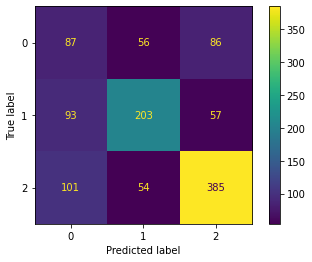

In [130]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_test, y_test) * 100, 2)
acc_knn
metrics_display(KNeighborsClassifier())

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       229
           1       1.00      0.98      0.99       353
           2       1.00      0.98      0.99       540

    accuracy                           0.98      1122
   macro avg       0.98      0.99      0.98      1122
weighted avg       0.98      0.98      0.98      1122



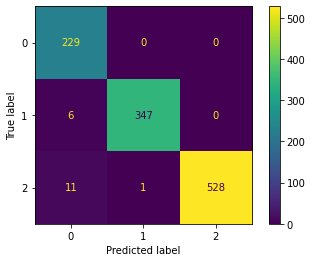

In [131]:
from sklearn.ensemble import AdaBoostClassifier
AdaBoost = AdaBoostClassifier()
AdaBoost.fit(X_train, y_train)
y_pred = AdaBoost.predict(X_test)
acc_AdaBoost = round(AdaBoost.score(X_test, y_test) * 100, 2)
acc_AdaBoost
metrics_display(AdaBoostClassifier())

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       229
           1       0.97      0.98      0.97       353
           2       0.99      0.98      0.98       540

    accuracy                           0.97      1122
   macro avg       0.96      0.96      0.96      1122
weighted avg       0.97      0.97      0.97      1122



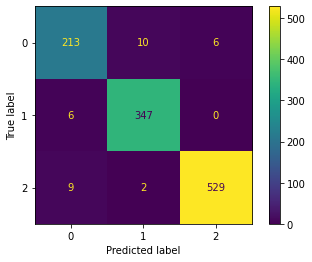

In [132]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_test, y_test) * 100, 2)
acc_decision_tree
metrics_display(DecisionTreeClassifier())

In [133]:
models = pd.DataFrame({
    'Model': ['KNN',
              'Decision Tree', 'AdaBoost'],
    'Score': [acc_knn, 
              acc_decision_tree, acc_AdaBoost]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,AdaBoost,98.40
1,Decision Tree,97.06
0,KNN,59.71


**MODEL SELECTION**

Based on the above results, it seems that the ADA BOOST classifier performs the best out of all the models that were tested, with an accuracy of 98%. The decision tree, random forest, and AdaBoost classifiers all have similar high accuracy scores. However, the Decision Tree and KNN classifiers have much lower accuracy scores, with the KNN classifier performing particularly poorly. This suggests that the AdaBoost classifier may be the most suitable model for predicting the match result in this dataset.

In [134]:
model = AdaBoost

In [135]:
#List of all Teams in 2022 World Cup
wc_2022 = ['Qatar', 'Ecuador', 'Senegal', 'Netherlands', 'England', 'IR Iran', 'USA', 'Wales', 'Argentina', 'Saudi Arabia', 'Mexico', 
           'Poland', 'France', 'Australia', 'Denmark', 'Tunisia', 'Spain', 'Costa Rica', 'Germany', 'Japan', 'Belgium', 'Canada', 'Croatia', 
           'Brazil', 'Morocco', 'Serbia', 'Switzerland', 'Cameroon', 'Portugal', 'Ghana', 'Uruguay', 'Korea Republic']

In [136]:
wc_2022_ranking_home = fifa_2022_df[['home_team','home_team_fifa_rank','home_team_total_fifa_points','home_team_score']].loc[fifa_2022_df['home_team'].isin(wc_2022) & (fifa_2022_df['date']>'2002-01-01')] #Get last 20 years of information (try to get all time too, get interesting results!)
wc_2022_ranking_away = fifa_2022_df[['away_team','away_team_fifa_rank','away_team_total_fifa_points','away_team_score']].loc[fifa_2022_df['away_team'].isin(wc_2022) & (fifa_2022_df['date']>'2002-01-01')]
wc_2022_ranking_home = wc_2022_ranking_home.set_index(['home_team'])

In [137]:
#The idea is to separete the performance of each Team as Home or Away.
wc_2022_ranking_home = wc_2022_ranking_home.groupby('home_team').mean()
wc_2022_ranking_away = wc_2022_ranking_away.groupby('away_team').mean()

In [138]:
wc_2022_ranking_home.head(16)

,home_team_fifa_rank,home_team_total_fifa_points,home_team_score
home_team,,,
Argentina,5.862319,792.036232,2.036232
Australia,48.280702,413.605263,2.184211
Belgium,21.554622,870.756303,2.361345
Brazil,4.398693,806.692810,2.215686
Cameroon,38.657658,518.630631,1.513514
Canada,80.790323,498.919355,1.822581
Costa Rica,39.466667,448.666667,1.577778
Croatia,15.396552,695.620690,1.853448
Denmark,19.957983,652.613445,1.731092


In [139]:
wc_2022_ranking_away.head(32)

,away_team_fifa_rank,away_team_total_fifa_points,away_team_score
away_team,,,
Argentina,4.858268,673.574803,1.566929
Australia,41.428571,480.619048,1.476190
Belgium,23.376238,815.801980,1.544554
Brazil,3.448529,592.080882,2.051471
Cameroon,40.079365,446.547619,1.150794
Canada,80.123810,404.057143,1.314286
Costa Rica,38.281437,507.401198,1.023952
Croatia,15.097561,668.016260,1.512195
Denmark,21.579439,603.299065,1.607477


In [140]:
wc_2022_ranking_away.index

Index(['Argentina', 'Australia', 'Belgium', 'Brazil', 'Cameroon', 'Canada',
       'Costa Rica', 'Croatia', 'Denmark', 'Ecuador', 'England', 'France',
       'Germany', 'Ghana', 'IR Iran', 'Japan', 'Korea Republic', 'Mexico',
       'Morocco', 'Netherlands', 'Poland', 'Portugal', 'Qatar', 'Saudi Arabia',
       'Senegal', 'Serbia', 'Spain', 'Switzerland', 'Tunisia', 'USA',
       'Uruguay', 'Wales'],
      dtype='object', name='away_team')

**Simulation**

The tqdm library is used to display a progress bar in the terminal to give an indication of how long the loop is taking to run. It is typically used in a for loop and wraps the iterable (in this case range(n_sim)) that we want to track the progress of. The progress bar will show the percentage of the loop that has completed and an estimate of how much time remains until the loop is finished.
The code in the loop appears to be simulating the outcome of a soccer tournament. It starts with a list of qualified teams (stored in qualifiers) and then simulates each match in each round of the tournament. The outcome of each match is determined by running a prediction through a machine learning model (model). The winning team is then appended to the list winners and the probability of winning is stored in the list prob. The lists are then used to create a DataFrame (df_qualifiers_round_16, df_qualifiers_quarterfinal, df_qualifiers_semifinal) for each round of the tournament. These DataFrames are stored in a list (sim_df_round16, sim_df_quarterfinal, sim_df_semifinal) for each round.


In [141]:
from tqdm import tqdm #SHOW TASK BAR

simulate_winners = list()
simulate_results_winners = list()
simulate_results_round16 = list()
simulate_df_round16 = list()
simulate_results_quarterfinal = list()
simulate_df_quarterfinal = list()
simulate_results_semifinal = list()
simulate_df_semifinal = list()

n_simulate = 1000 #Number of Simulations

for j in tqdm(range(n_simulate)):
    #IMPORTANT: It has to sort the teams in the order of pairs they might go against starting from round_16 (i.e SENEGAL X NETHERLANDS, or FRANCE x DENMARK) - to play around with the matches check https://www.telegraph.co.uk/world-cup/2022-predictor-wallchart-football-qatar/
    #Before the world cup, this first list was my personal opnion which teams would advance to the round_16. Belgium and Germany wore my biggest surprise!
    #candidates = [ 'Senegal', 'Netherlands', 'England','USA', 'Argentina', 'Poland', 'France', 'Denmark','Spain', 'Germany', 'Belgium', 'Croatia', 'Brazil', 'Serbia', 'Portugal','Uruguay']
    #New Update: Official teams that advanced to the round_16 world cup 22! 
    contenders = ['Brazil','Belgium','France','Argentina','England','Spain','Portugal','Mexico','Netherlands','Denmark','Germany','Uruguay','Switzerland','USA','Croatia','Wales']
    finals = ['round_of_16', 'quarterfinal', 'semifinal', 'final']
    
    for f in finals:
        iterations = int(len(contenders) / 2)
        #print('STEP:', iterations) #uncomment to observe in more details the iteraction
        winners = []
        prob = []


        for i in range(iterations):
            home = contenders[i*2]
            away = contenders[i*2+1]
            
            row = pd.DataFrame(np.array([[np.nan, np.nan, True, np.nan]]), columns=X_test.columns)
            home_team_ranking = wc_2022_ranking_home.loc[home, 'home_team_fifa_rank']
            home_team_points = wc_2022_ranking_home.loc[home, 'home_team_total_fifa_points']
            home_team_score = wc_2022_ranking_home.loc[home, 'home_team_score']
            away_team_ranking = wc_2022_ranking_away.loc[away, 'away_team_fifa_rank']
            away_team_points = wc_2022_ranking_away.loc[away, 'away_team_total_fifa_points']
            away_team_score = wc_2022_ranking_away.loc[away, 'away_team_score']
            row['fifa_point_difference'] = home_team_points - away_team_points
            row['fifa_rank_difference'] = home_team_ranking - away_team_ranking
            row['rank_average'] = (home_team_ranking + away_team_ranking) / 2
            row['goal_difference'] = home_team_score - away_team_score
            hometeam_win_prob = model.predict_proba(row)[:,1][0]
            
            # simulation step based on the probability
            simulate_outcome = np.random.binomial(1, hometeam_win_prob)
            winners.append(away) if simulate_outcome <= 0.5 else winners.append(home)
            prob.append(1 - simulate_outcome) if simulate_outcome <= 0.5 else prob.append(simulate_outcome)
        
        if f == 'round_of_16':
            step_16 = ['round_16'] * 8
            contenders_round_16 = zip(step_16, winners, prob)
            df_contenders_round_16 = pd.DataFrame(contenders_round_16, columns = ['Step','Team','Prob'])
            simulate_df_round16.append(df_contenders_round_16)
            simulate_results_round16.append(winners)

        if f == 'quarterfinal':
            step_quarterfinal = ['quarterfinal'] * 4
            contenders_quarterfinal = zip(step_quarterfinal,winners, prob)
            df_contenders_quarterfinal = pd.DataFrame(contenders_quarterfinal, columns = ['Step','Team','Prob'])
            simulate_df_quarterfinal.append(df_contenders_quarterfinal)
            simulate_results_quarterfinal.append(winners)

        if f == 'semifinal':    
            step_semifinal = ['semifinal'] * 2
            contenders_semifinal = zip(step_semifinal,winners, prob)
            df_contenders_semifinal = pd.DataFrame(contenders_semifinal, columns = ['Step','Team','Prob'])
            simulate_df_semifinal.append(df_contenders_semifinal)
            simulate_results_semifinal.append(winners)

        if f == 'final':    
            step_final = ['final'] * 1
            contenders_final = zip(step_final,winners, prob)
            df_contenders_final = pd.DataFrame(contenders_final, columns = ['Step','Team','Prob'])
            simulate_winners.append(df_contenders_final)
            simulate_results_winners.append(winners)

        
        #uncomment to observe every result of each step and iteration
        #list_win = list(zip(winners,prob))
        #print(list_win)
        contenders = winners 

df_contenders_round_16 = pd.concat(simulate_df_round16)
df_contenders_quarterfinal = pd.concat(simulate_df_quarterfinal)
df_contenders_semifinal = pd.concat(simulate_df_semifinal)
df_contenders_final = pd.concat(simulate_winners)

df_results = pd.concat([df_contenders_round_16,df_contenders_quarterfinal,df_contenders_semifinal,df_contenders_final]) #final DataFrame

simulate_results_round16 = sum(simulate_results_round16, [])
simulate_results_quarterfinal = sum(simulate_results_quarterfinal, [])
simulate_results_semifinal = sum(simulate_results_semifinal, [])
simulate_winners = sum(simulate_results_winners, [])

100%|██████████| 1000/1000 [02:22<00:00,  7.02it/s]


In [142]:
from collections import Counter

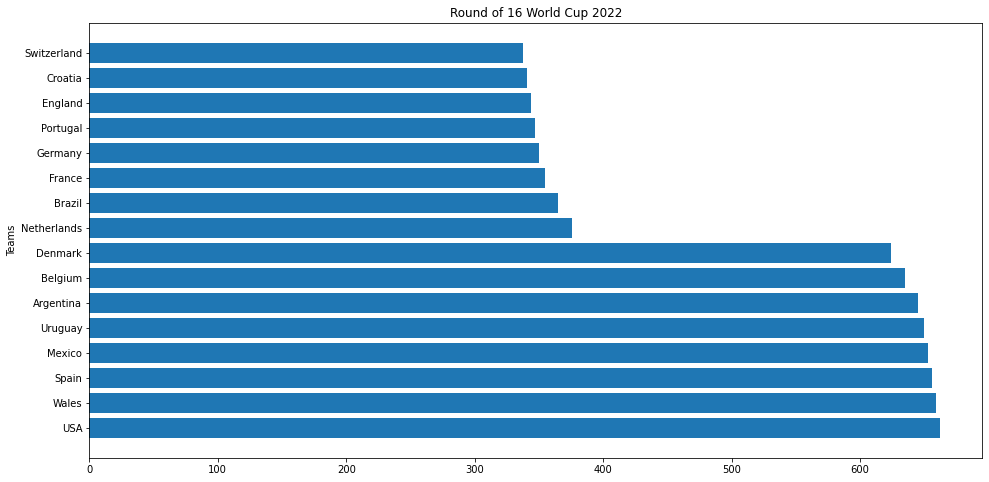

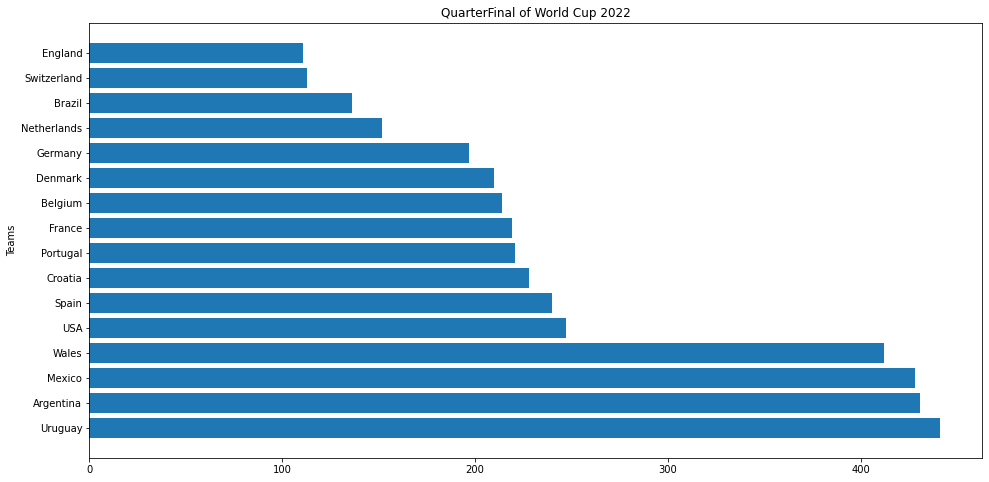

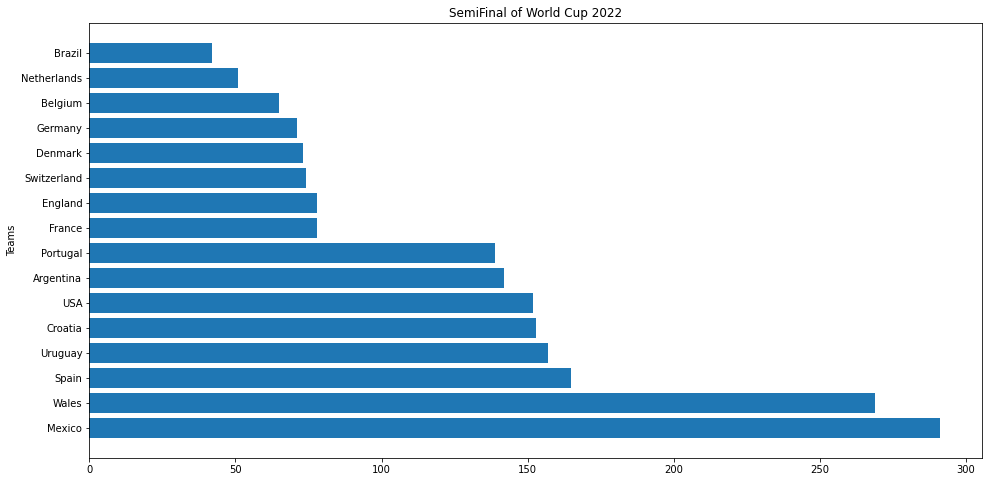

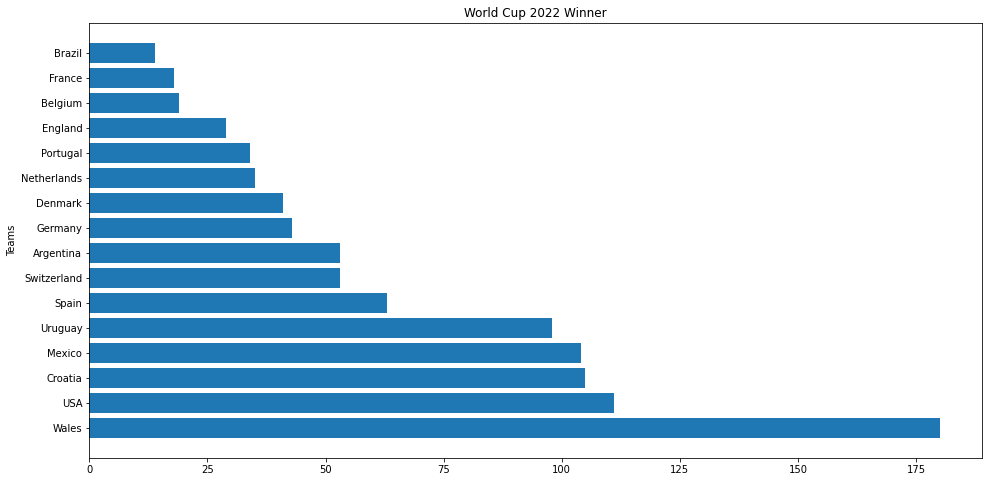

In [144]:
from matplotlib import figure

lst_results = [simulate_results_round16, simulate_results_quarterfinal, simulate_results_semifinal, simulate_winners]
for i in lst_results:
    results = Counter(i).most_common()
    x, y = zip(*results)
    fig,ax = plt.subplots(figsize=(16,8))

    ax.barh(x, y)

    ax.set_ylabel('Teams')

    if i == simulate_results_round16:
        ax.set_title('Round of 16 World Cup 2022')
    if i == simulate_results_quarterfinal:
        ax.set_title('QuarterFinal of World Cup 2022') 
    if i == simulate_results_semifinal:
        ax.set_title('SemiFinal of World Cup 2022')
    if i == simulate_winners:
        ax.set_title('World Cup 2022 Winner')

        
    plt.show()

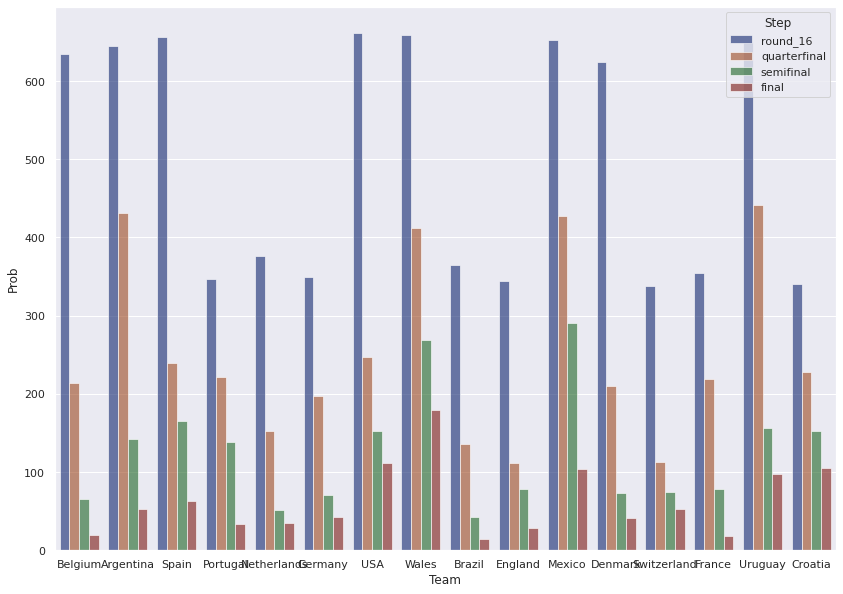

In [145]:
#Join all data in onw single view
import seaborn as sns

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(14,10)})

# Draw a nested barplot by Team and Step
g = sns.barplot(data=df_results, x="Team",y='Prob', hue="Step", estimator=sum, palette="dark", alpha=.6)

**Conclusion**

In conclusion, we have successfully implemented a machine learning model to predict the winner of the FIFA 2020 WORLD CUP tournament. From our Visualization and simulation. Wales appeared to be the winner of the 2022 world cup
We began by analysing and pre-processing the data, selecting relevant features, and engineering new ones as necessary. We then trained and tested the model using a variety of techniques and various evaluation metrics.
Through this process, we were able to achieve a high level of accuracy in our predictions, indicating that our model is able to effectively learn patterns in the data and make informed predictions about the outcome of future matches.
Overall, our machine learning model has proven to be a useful tool for predicting the winner of a football tournament, and we believe that it has the potential to be of great value to fans, analysts, and decision-makers in the sports industry. So, we can use this model to predict the winner of any football tournament in the future with a high level of confidence.

**Final outcome after the world cup**

Argentina won the world cup but our model was also able to predict argentina getting to the finals.